In [2]:
from miniflow import *

x, y, z = Input(), Input(), Input()

#f = Add(x, y, z)
f2 = Mul(x,y,z)

feed_dict = {x: 4, y: 5, z: 10}

graph = topological_sort(feed_dict)
#output = forward_pass(f, graph)
output_mul = forward_pass(f2, graph)

# should output 19
print("{} + {} + {} = {} (according to miniflow)".format(feed_dict[x], feed_dict[y], feed_dict[z], output))
print("{} x {} x {} = {} (according to miniflow)".format(feed_dict[x], feed_dict[y], feed_dict[z], output_mul))

1
4
20
4 + 5 + 10 = 19 (according to miniflow)
4 x 5 x 10 = 200 (according to miniflow)


In [1]:
"""
NOTE: Here we're using an Input node for more than a scalar.
In the case of weights and inputs the value of the Input node is
actually a python list!

In general, there's no restriction on the values that can be passed to an Input node.
"""
from miniflow import *

inputs, weights, bias = Input(), Input(), Input()

f = Linear(inputs, weights, bias)

feed_dict = {
    inputs: [6, 14, 3],
    weights: [0.5, 0.25, 1.4],
    bias: 2
}

graph = topological_sort(feed_dict)
output = forward_pass(f, graph)

print(output) # should be 12.7 with this example

12.7


In [1]:
"""
The setup is similar to the prevous `Linear` node you wrote
except you're now using NumPy arrays instead of python lists.

Update the Linear class in miniflow.py to work with
numpy vectors (arrays) and matrices.

Test your code here!
"""

import numpy as np
from miniflow import *

X, W, b = Input(), Input(), Input()

f = Linear(X, W, b)

X_ = np.array([[-1., -2.], [-1, -2]])
W_ = np.array([[2., -3], [2., -3]])
b_ = np.array([-3., -5])

feed_dict = {X: X_, W: W_, b: b_}

graph = topological_sort(feed_dict)
output = forward_pass(f, graph)

"""
Output should be:
[[-9., 4.],
[-9., 4.]]
"""
print(output)

[[-9.  4.]
 [-9.  4.]]


In [1]:
"""
This network feeds the output of a linear transform
to the sigmoid function.

Finish implementing the Sigmoid class in miniflow.py!

Feel free to play around with this network, too!
"""

import numpy as np
from miniflow import *

X, W, b = Input(), Input(), Input()

f = Linear(X, W, b)
g = Sigmoid(f)

X_ = np.array([[-1., -2.], [-1, -2]])
W_ = np.array([[2., -3], [2., -3]])
b_ = np.array([-3., -5])

feed_dict = {X: X_, W: W_, b: b_}

graph = topological_sort(feed_dict)
output = forward_pass(g, graph)

"""
Output should be:
[[  1.23394576e-04   9.82013790e-01]
 [  1.23394576e-04   9.82013790e-01]]
"""
print(output)

[[1.23394576e-04 9.82013790e-01]
 [1.23394576e-04 9.82013790e-01]]


In [1]:
"""
Test your MSE method with this script!

No changes necessary, but feel free to play
with this script to test your network.
"""

import numpy as np
from miniflow import *

y, a = Input(), Input()
cost = MSE(y, a)

y_ = np.array([1, 2, 3])
a_ = np.array([4.5, 5, 10])

feed_dict = {y: y_, a: a_}
graph = topological_sort(feed_dict)
# forward pass
forward_pass(graph)

"""
Expected output

23.4166666667
"""
print(cost.value)

23.416666666666668


In [1]:
"""
Test your network here!

No need to change this code, but feel free to tweak it
to test your network!

Make your changes to backward method of the Sigmoid class in miniflow.py
"""

import numpy as np
from miniflow import *

X, W, b = Input(), Input(), Input()
y = Input()
f = Linear(X, W, b)
a = Sigmoid(f)
cost = MSE(y, a)

X_ = np.array([[-1., -2.], [-1, -2]])
W_ = np.array([[2.], [3.]])
b_ = np.array([-3.])
y_ = np.array([1, 2])

feed_dict = {
    X: X_,
    y: y_,
    W: W_,
    b: b_,
}

graph = topological_sort(feed_dict)
forward_and_backward(graph)
# return the gradients for each Input
gradients = [t.gradients[t] for t in [X, y, W, b]]

"""
Expected output

[array([[ -3.34017280e-05,  -5.01025919e-05],
       [ -6.68040138e-05,  -1.00206021e-04]]), array([[ 0.9999833],
       [ 1.9999833]]), array([[  5.01028709e-05],
       [  1.00205742e-04]]), array([ -5.01028709e-05])]
"""
print(gradients)

[array([[-3.34017280e-05, -5.01025919e-05],
       [-6.68040138e-05, -1.00206021e-04]]), array([[0.9999833],
       [1.9999833]]), array([[5.01028709e-05],
       [1.00205742e-04]]), array([-5.01028709e-05])]


In [13]:
"""
Check out the new network architecture and dataset!

Notice that the weights and biases are
generated randomly.

No need to change anything, but feel free to tweak
to test your network, play around with the epochs, batch size, etc!
"""

import numpy as np
from sklearn.datasets import load_boston
from sklearn.utils import shuffle, resample
from miniflow import *

# Load data
data = load_boston()
X_ = data['data']
y_ = data['target']

# Normalize data
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)

n_features = X_.shape[1]
n_hidden = 10
W1_ = np.random.randn(n_features, n_hidden)
b1_ = np.zeros(n_hidden)
W2_ = np.random.randn(n_hidden, 1)
b2_ = np.zeros(1)

# Neural network
X, y = Input(), Input()
W1, b1 = Input(), Input()
W2, b2 = Input(), Input()

l1 = Linear(X, W1, b1)
s1 = Sigmoid(l1)
l2 = Linear(s1, W2, b2)
cost = MSE(y, l2)

feed_dict = {
    X: X_,
    y: y_,
    W1: W1_,
    b1: b1_,
    W2: W2_,
    b2: b2_
}

epochs = 1000
# Total number of examples
m = X_.shape[0]
batch_size = 11
steps_per_epoch = m // batch_size

graph = topological_sort(feed_dict)
trainables = [W1, b1, W2, b2]

print("Total number of examples = {}".format(m))
loss_list = []
# Step 4
for i in range(epochs):
    loss = 0
    for j in range(steps_per_epoch):
        # Step 1
        # Randomly sample a batch of examples
        X_batch, y_batch = resample(X_, y_, n_samples=batch_size)

        # Reset value of X and y Inputs
        X.value = X_batch
        y.value = y_batch

        # Step 2
        forward_and_backward(graph)

        # Step 3
        sgd_update(trainables)

        loss += graph[-1].value
    loss_list.append(loss/steps_per_epoch)
    print("Epoch: {}, Loss: {:.3f}".format(i+1, loss/steps_per_epoch))



Total number of examples = 506
Epoch: 1, Loss: 144.054
Epoch: 2, Loss: 30.079
Epoch: 3, Loss: 30.103
Epoch: 4, Loss: 30.326
Epoch: 5, Loss: 26.892
Epoch: 6, Loss: 17.866
Epoch: 7, Loss: 18.593
Epoch: 8, Loss: 20.084
Epoch: 9, Loss: 12.756
Epoch: 10, Loss: 16.996
Epoch: 11, Loss: 15.601
Epoch: 12, Loss: 12.479
Epoch: 13, Loss: 11.910
Epoch: 14, Loss: 13.612
Epoch: 15, Loss: 14.359
Epoch: 16, Loss: 13.601
Epoch: 17, Loss: 10.632
Epoch: 18, Loss: 11.085
Epoch: 19, Loss: 13.154
Epoch: 20, Loss: 12.596
Epoch: 21, Loss: 10.791
Epoch: 22, Loss: 9.571
Epoch: 23, Loss: 9.976
Epoch: 24, Loss: 7.191
Epoch: 25, Loss: 9.846
Epoch: 26, Loss: 9.462
Epoch: 27, Loss: 8.905
Epoch: 28, Loss: 11.181
Epoch: 29, Loss: 9.177
Epoch: 30, Loss: 15.021
Epoch: 31, Loss: 8.056
Epoch: 32, Loss: 8.891
Epoch: 33, Loss: 11.024
Epoch: 34, Loss: 10.280
Epoch: 35, Loss: 10.317
Epoch: 36, Loss: 9.467
Epoch: 37, Loss: 7.856
Epoch: 38, Loss: 6.638
Epoch: 39, Loss: 9.268
Epoch: 40, Loss: 10.222
Epoch: 41, Loss: 6.062
Epoch: 

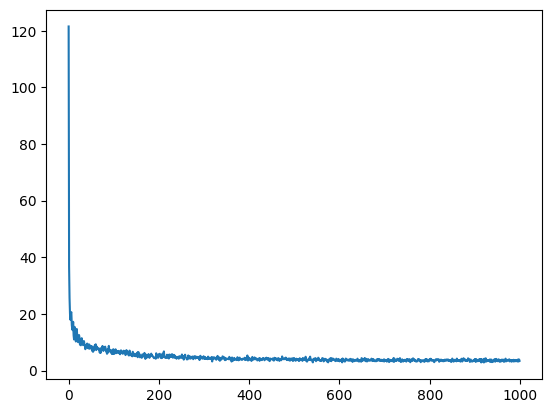

In [12]:
import matplotlib.pyplot as plt
plt.plot(loss_list)